In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')  

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
img1_path = 'drive/MyDrive/cv/lab2/cv2_5.jpg'
img2_path =  'drive/MyDrive/cv/lab2/cv2_3.jpg'

In [ ]:
book = cv2.imread(img1_path)
book_full = cv2.imread(img2_path)

In [ ]:
def sift_detector(image1, image2):
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    sift = cv2.SIFT_create()

    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    return keypoints1, descriptors1, keypoints2, descriptors2


In [ ]:
def opencv_matcher(kps1, des1, kps2, des2, img1, img2):
    bf = cv2.BFMatcher(cv2.NORM_L1)
    matches = bf.knnMatch(des1, des2, k=2) 

    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.8*n.distance:
            good.append([m])

  
    img3 = cv2.drawMatchesKnn(img1, kps1, img2, kps2, good[:10], None)
    plt.figure(figsize=(20,20))
    plt.imshow(img3) 
    plt.show() 

In [ ]:
def custom_matcher(kps1, des1, kps2, des2, img1, img2):
    matches = []
    for i, k1 in enumerate(des1):
        for j, k2 in enumerate(des2):
            matches.append(cv2.DMatch(_distance=np.linalg.norm((k1 - k2), ord=1), _imgIdx=0, _queryIdx=i,_trainIdx=j))
            
    matches = sorted(matches, key = lambda x : x.distance)
    img3 = cv2.drawMatches(img1, kps1, img2, kps2, matches[:10], None)
    plt.figure(figsize=(20,20))
    plt.imshow(img3) 
    plt.show()

In [ ]:
kps1, des1, kps2, des2 = sift_detector(book, book_full)

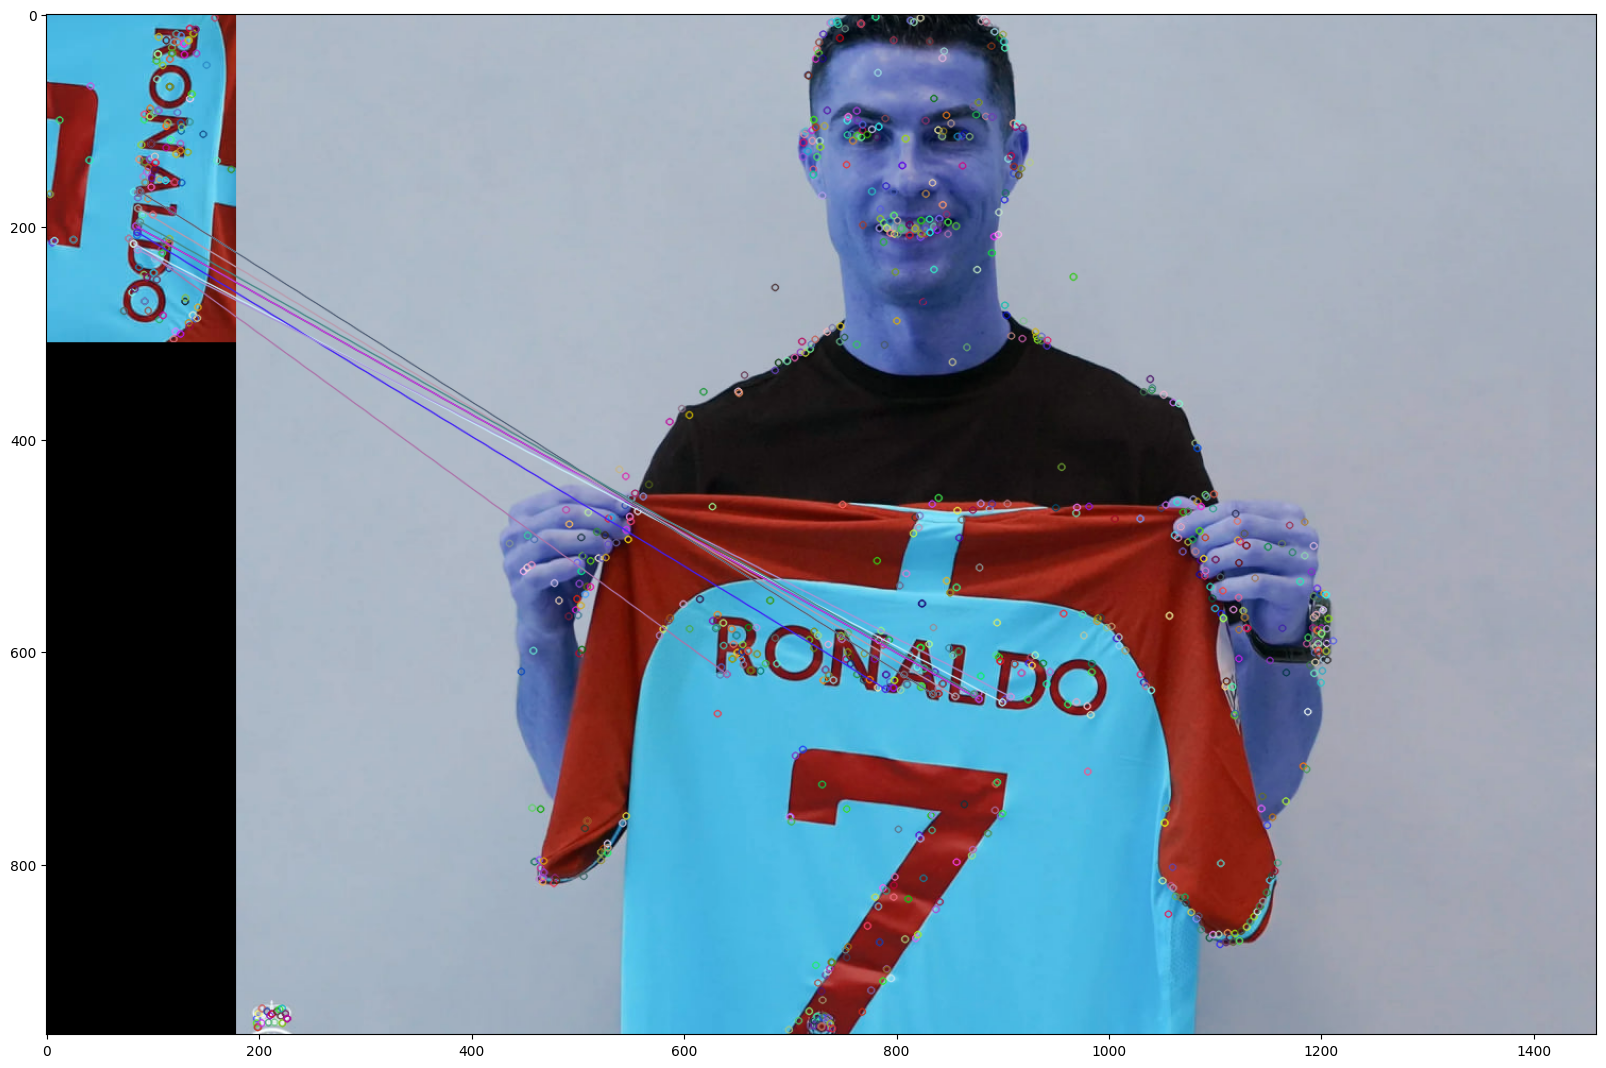

In [ ]:
opencv_matcher(kps1, des1, kps2, des2, book, book_full)

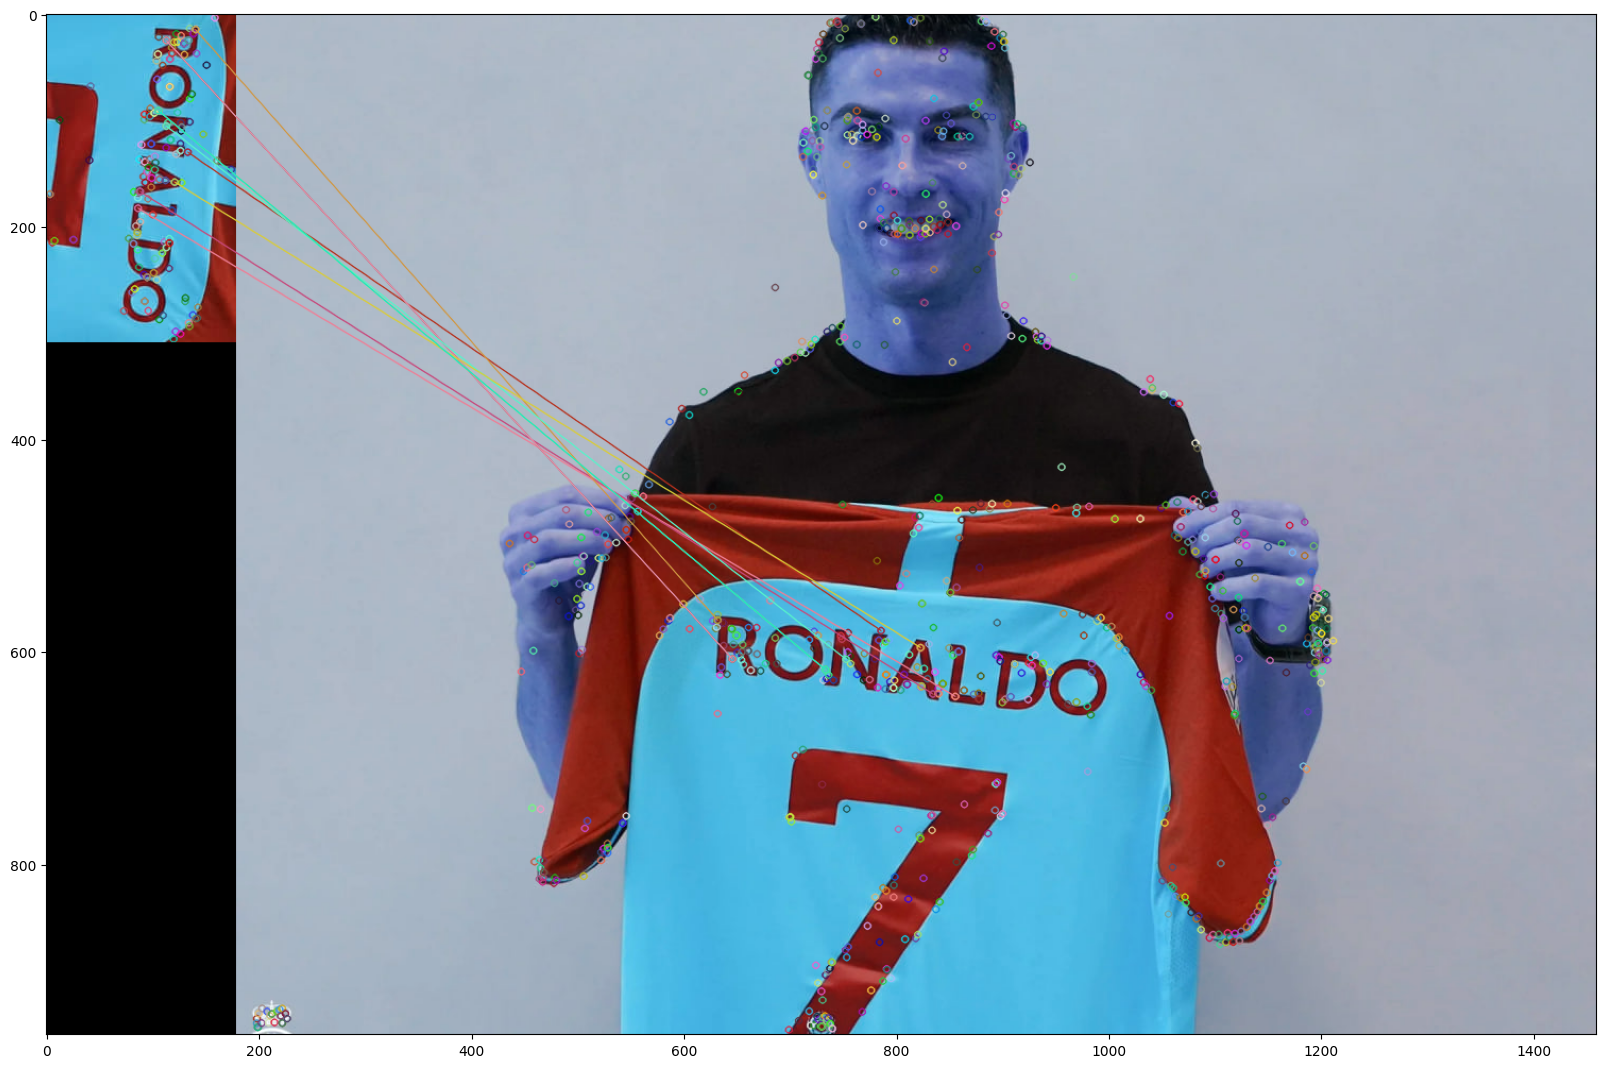

In [ ]:
custom_matcher(kps1, des1, kps2, des2, book, book_full)